### Name : Muhammad Mubeen
### College of Resources & Environment, UCAS
### Course : Data Science
### Project : 1
### Dataset : Wine Quality
### Outlier Detection and Removal


In [35]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Models

from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope

In [4]:
#import dataset
df = pd.read_csv('winequality-red.csv')

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


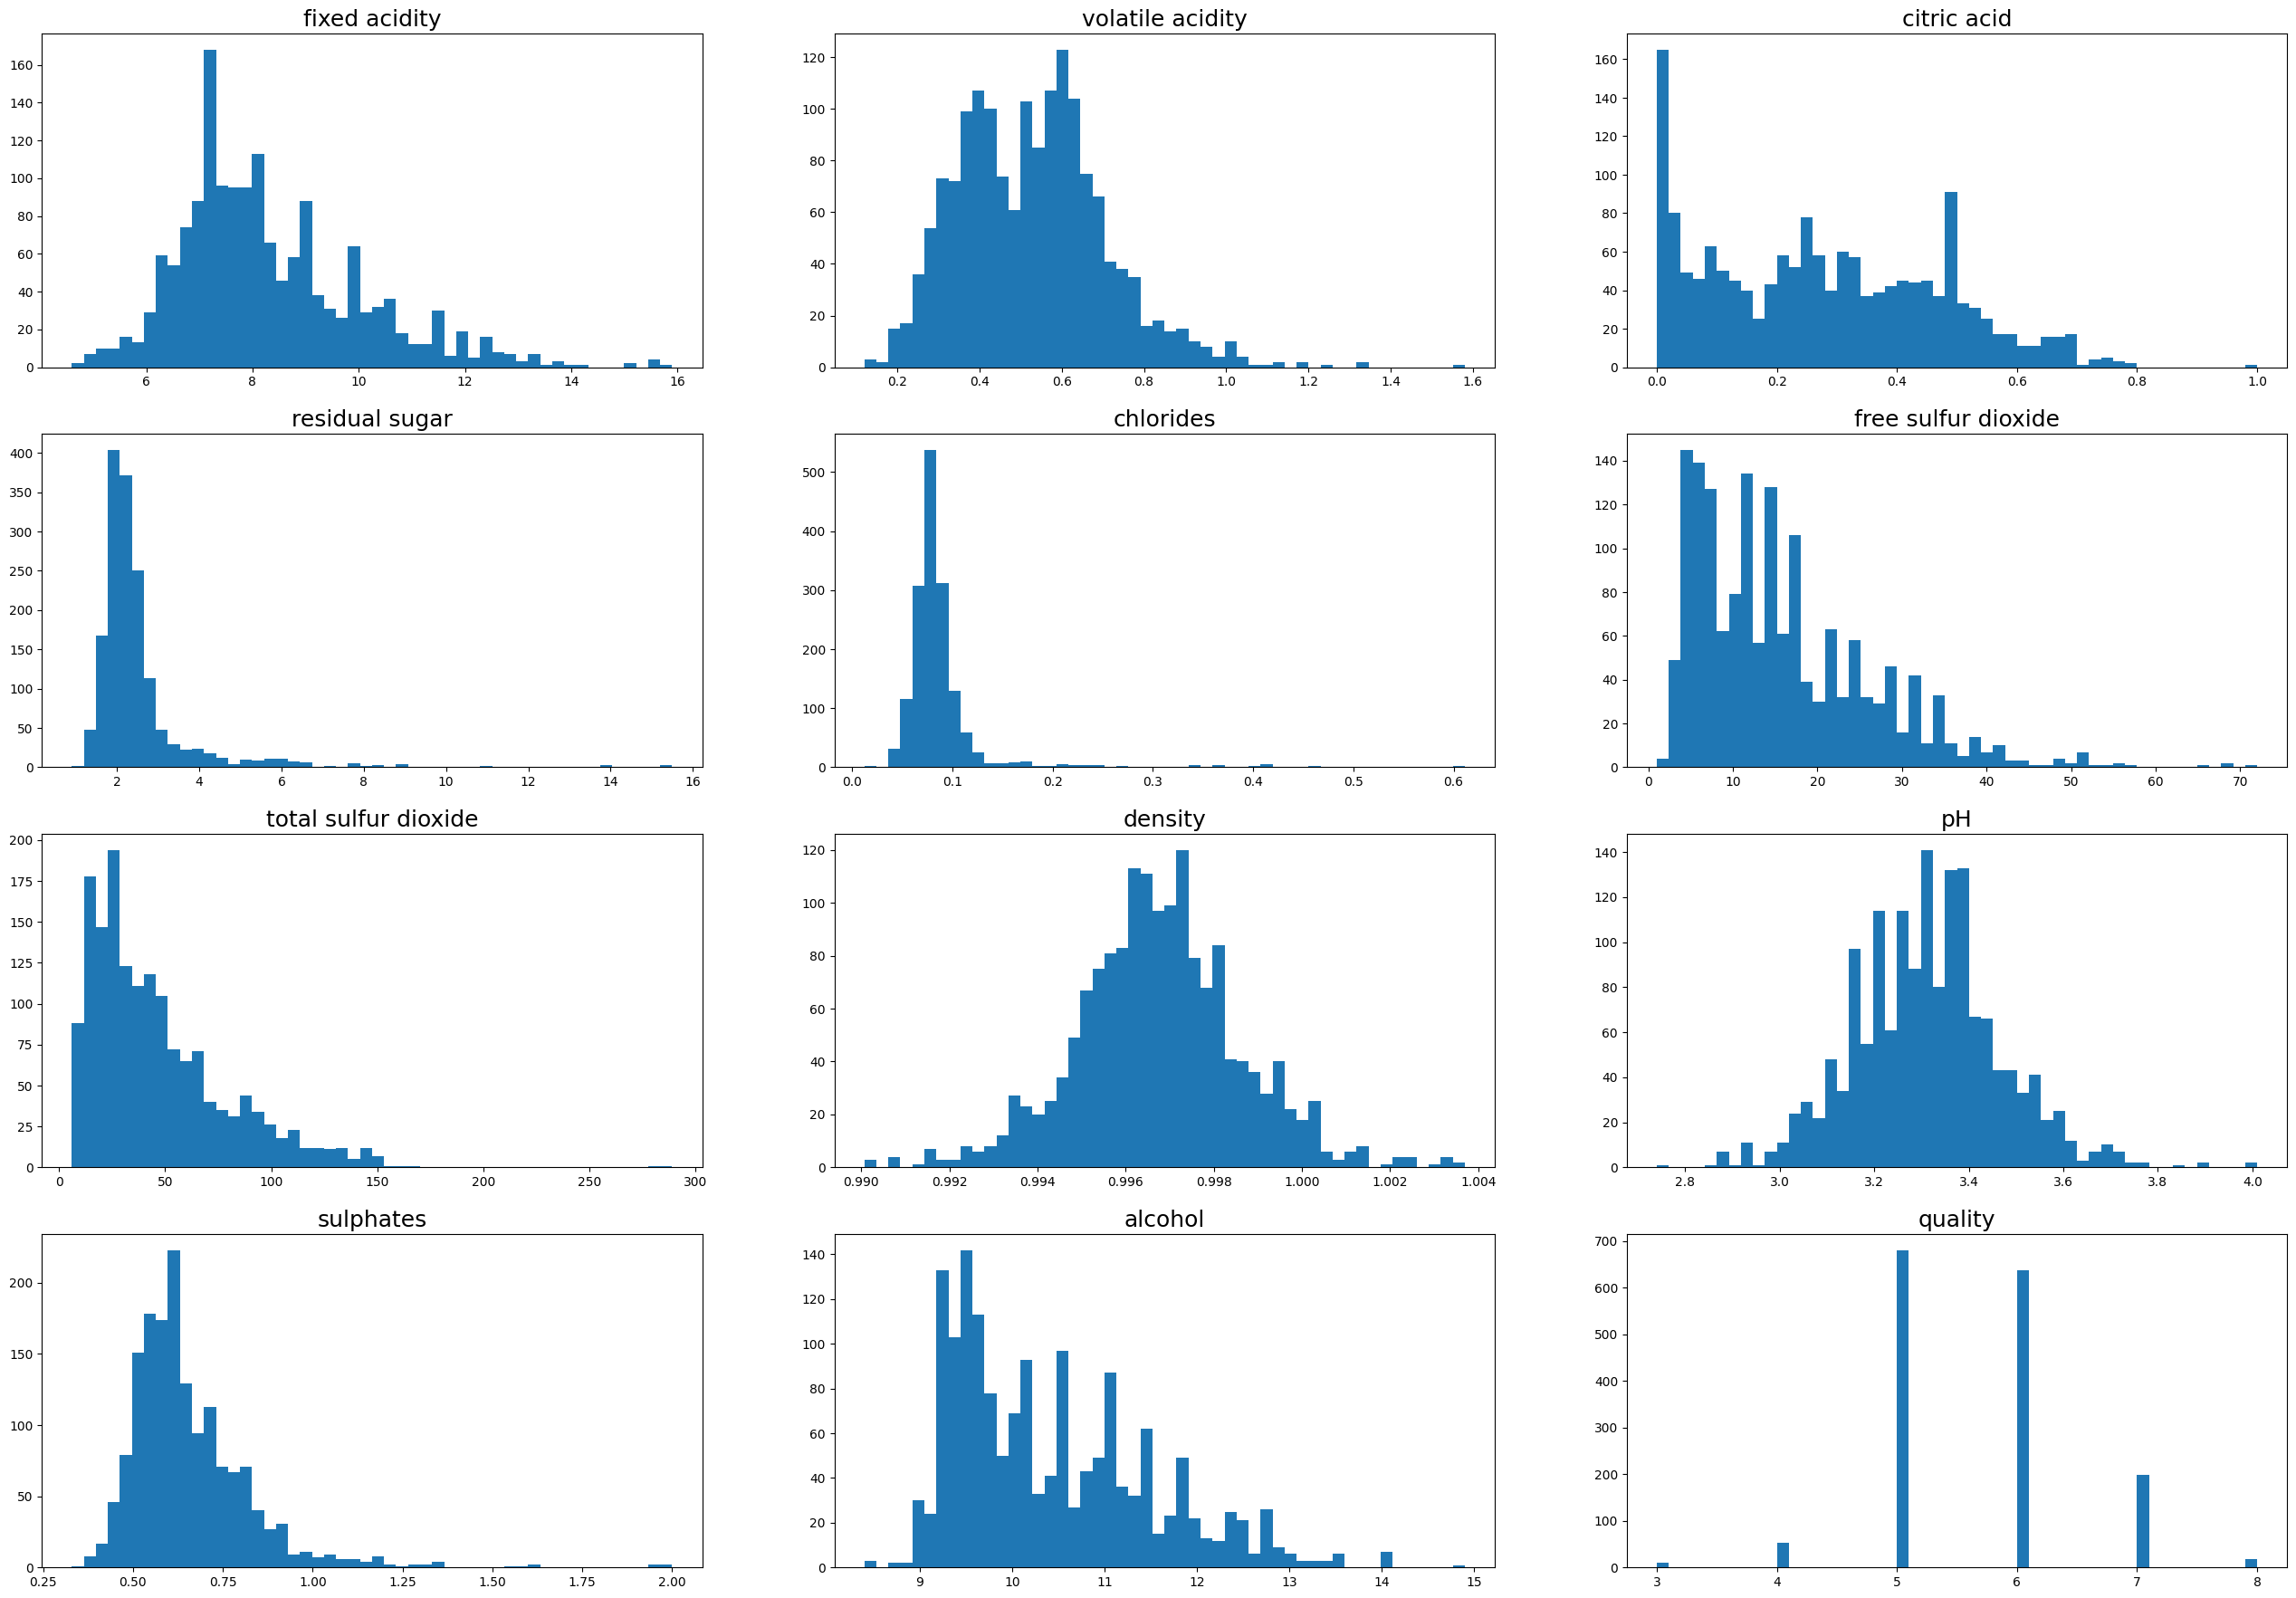

In [6]:
#Visulazation of Data
plt.figure(figsize=(32,22))
for i in range(1,df.shape[1]+1):
    plt.subplot(4,3,i)
    plt.hist(df.iloc[:,i-1],bins=50)
    plt.title(df.columns[i-1],fontsize=18)

### Using SD for outlier Detection

<p>
<h4>

1. A sample is considered an outlier if it deviates from the mean by a predetermined number of standard deviations. Outliers are typically defined using three standard deviations (99.7%), but on smaller datasets, two standard deviations (95%) may be appropriate.

2. By superimposing the outlier region onto the previous charts, the outlier boundaries can be seen.
</h4>
</p>

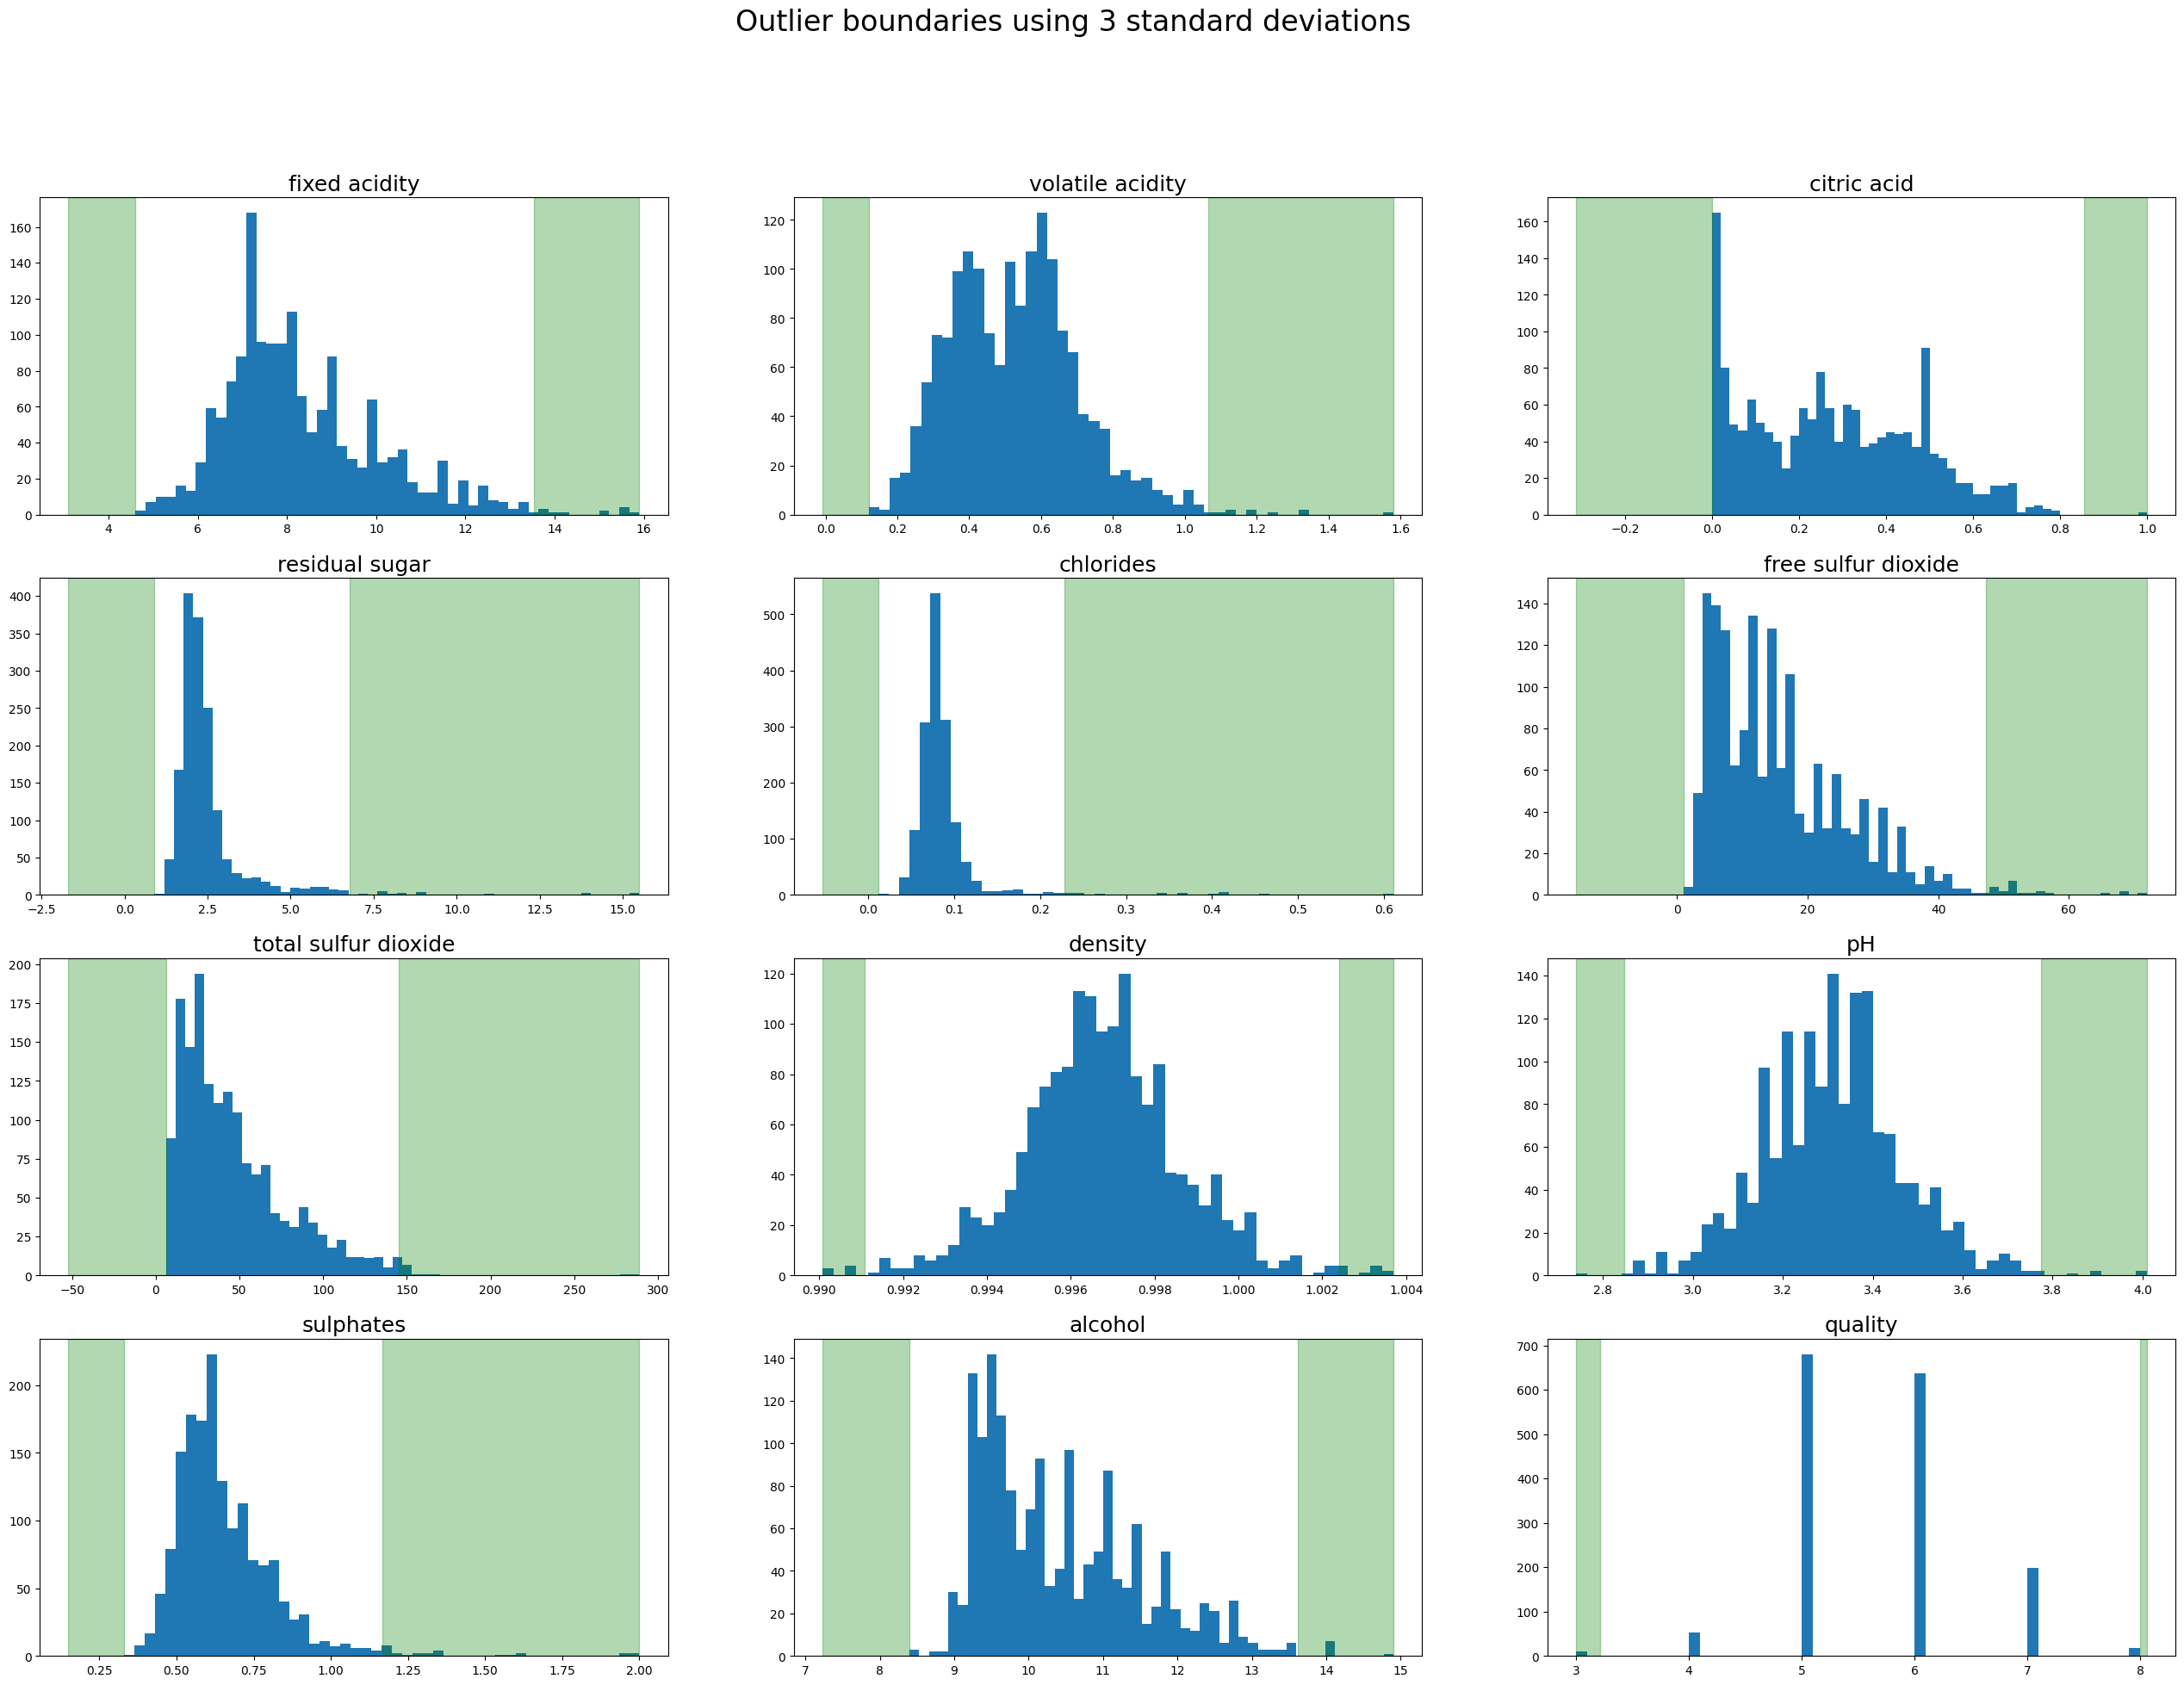

In [9]:
plt.figure(figsize=(32,22))
plt.suptitle('Outlier boundaries using 3 standard deviations',fontsize=24)
for i in range(1,df.shape[1]+1):
    feature = df.iloc[:,i-1]
    mean = feature.mean()
    std_3 = feature.std()*3
    lower, upper = mean-std_3,mean+std_3
    plt.subplot(4,3,i)
    plt.hist(df.iloc[:,i-1],bins=50)
    plt.title(df.columns[i-1],fontsize=18)
    plt.axvspan(feature.min(),lower,color='green',alpha=0.3)
    plt.axvspan(upper,feature.max(),color='green',alpha=0.3)


### IQR (Interquartle Range) for Outlier Boundaries

#### Using the following code, a list of outliers of the 'Sulphates' feature could be obtained:

In [11]:
s25 = np.percentile(df.sulphates,25)
s75 = np.percentile(df.sulphates,75)
iqr = s75 - s25
cutoff = iqr*1.5
lower = s25-cutoff
upper = s75 + cutoff

outliers = [x for x in df.sulphates if x < lower or x > upper]
print('Lowest 5 outliers : ',sorted(outliers)[:5]) 
print('Highest 5 outliers : ',sorted(outliers)[-5:])

Lowest 5 outliers :  [1.0, 1.01, 1.02, 1.02, 1.02]
Highest 5 outliers :  [1.62, 1.95, 1.95, 1.98, 2.0]


#### They could be plotted in any format using the lower and upper bounds we just calculated; however, a boxplot is probably my favourite because it clearly defines the quartiles and outlier boundaries. Outliers are plotted as individual points beyond the whiskers.

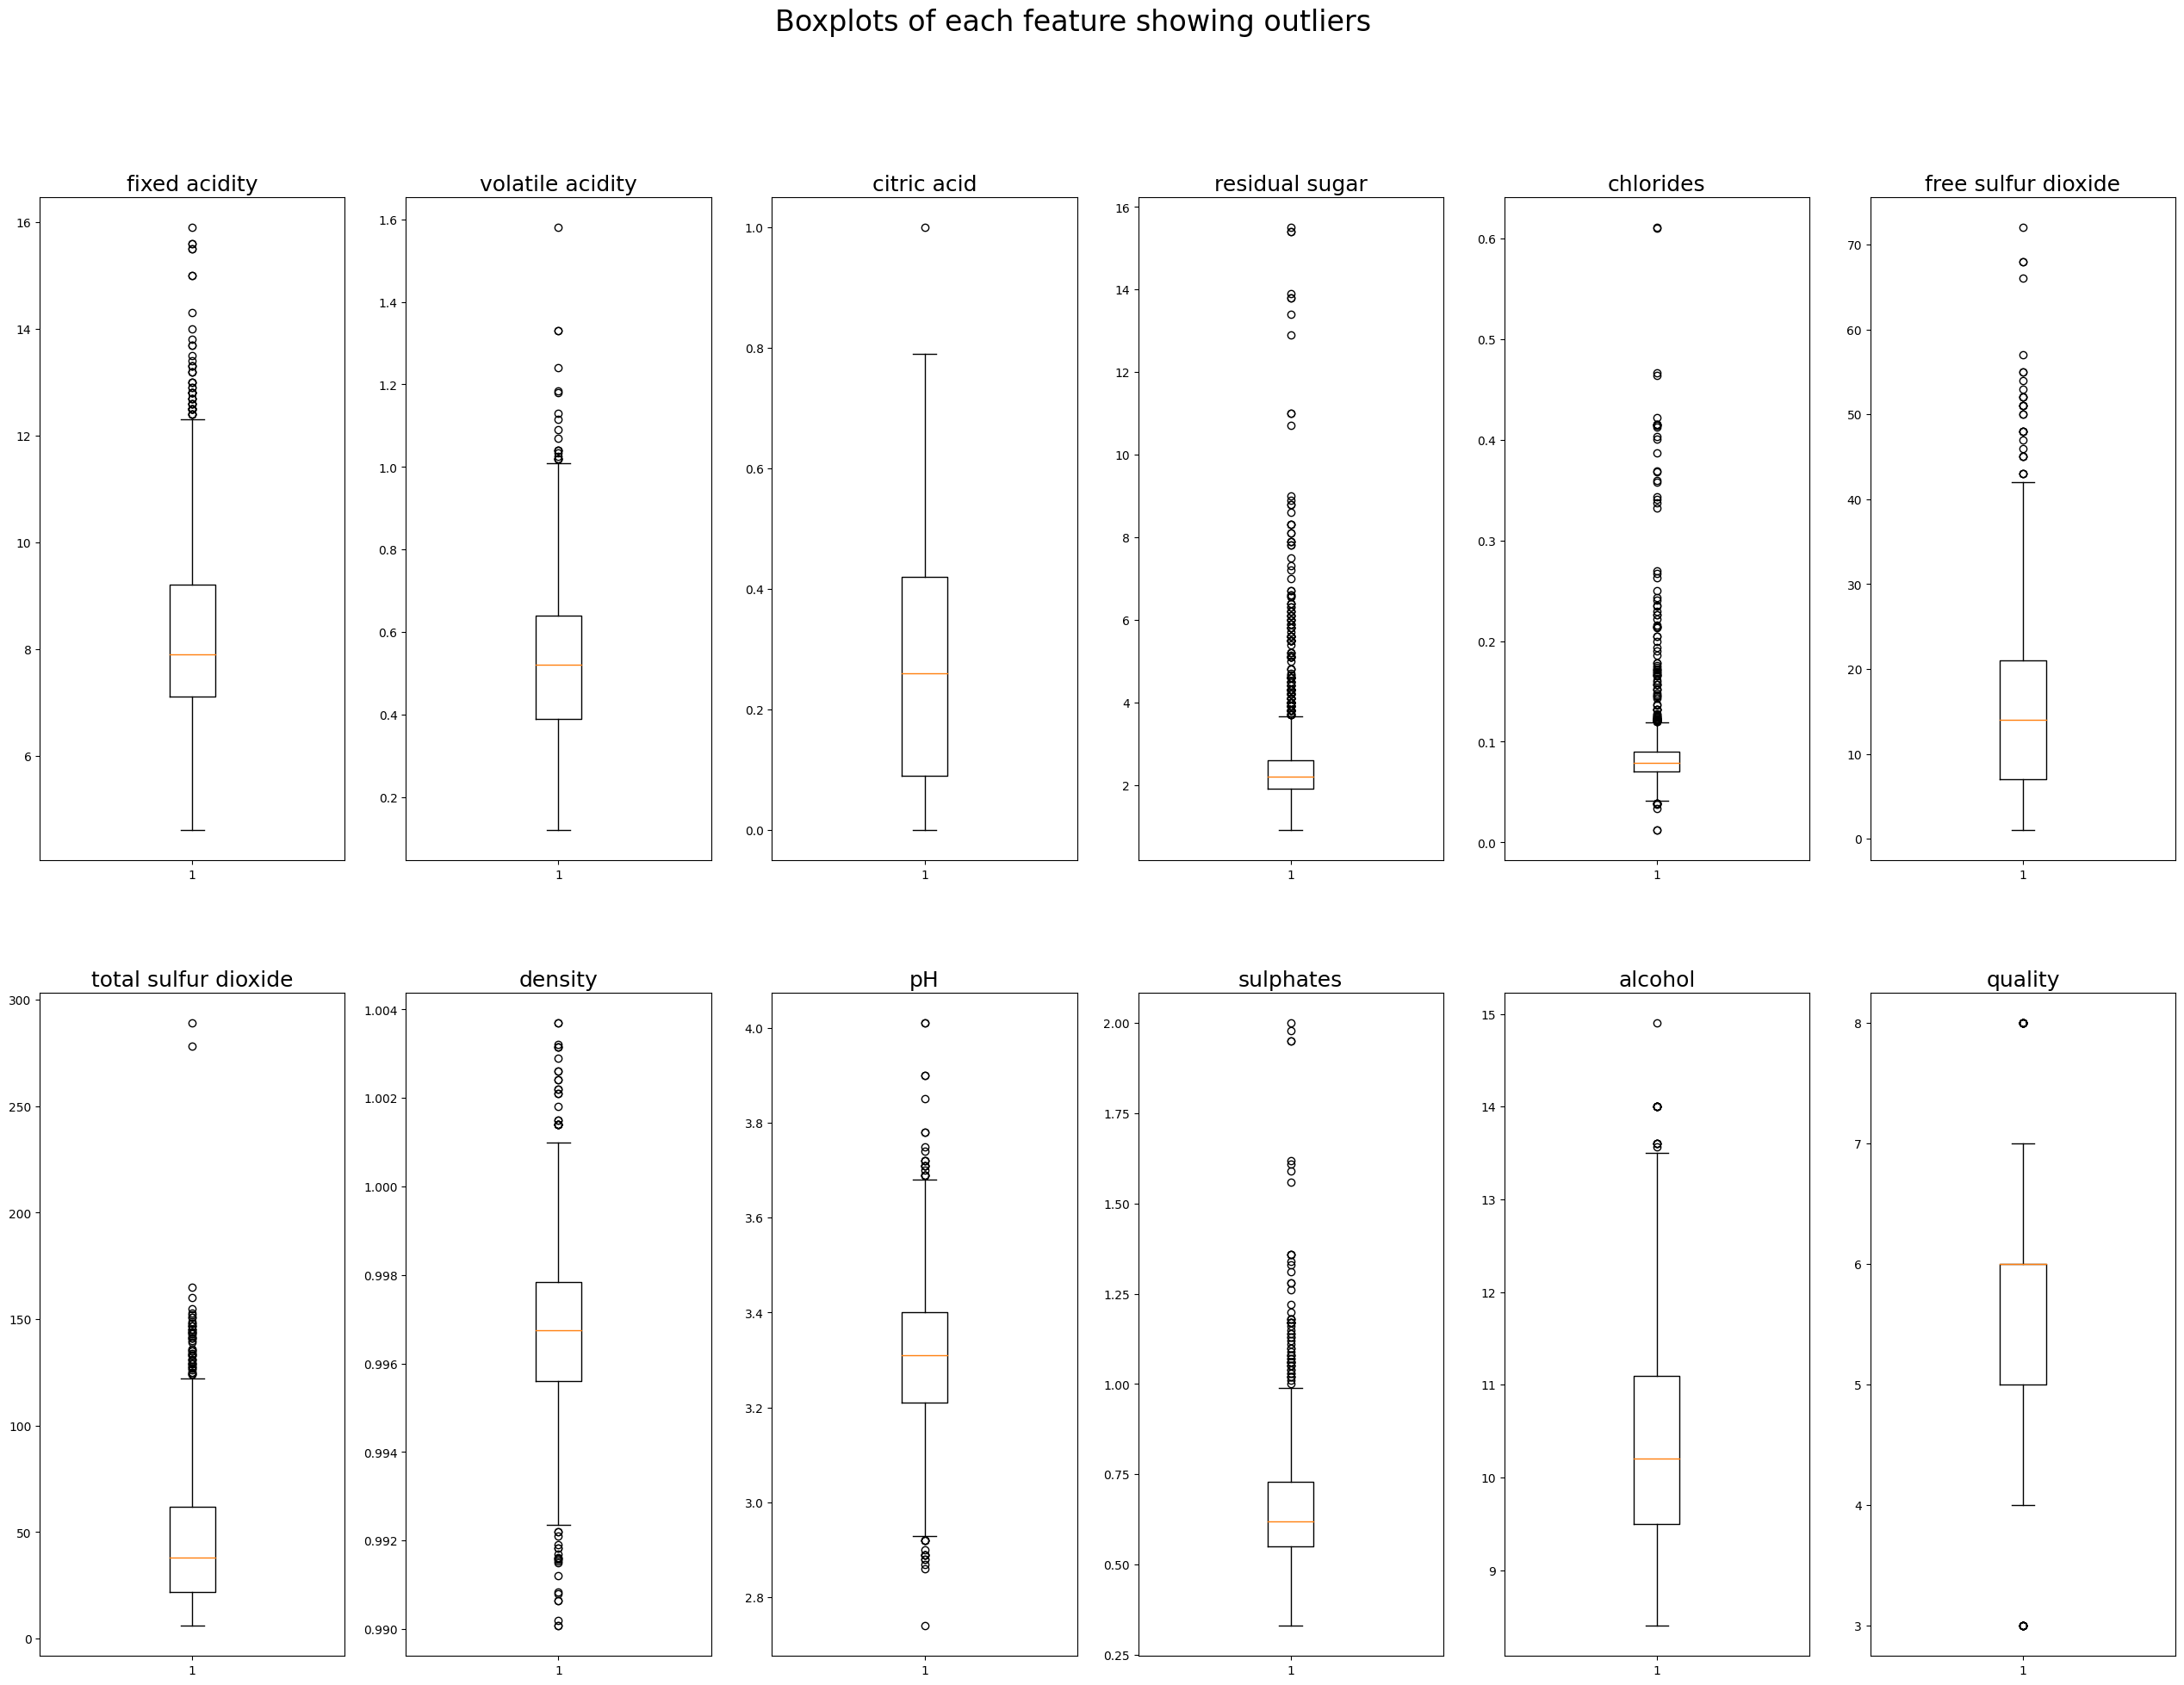

In [13]:
#Visualization code for outliers in boxplot
plt.figure(figsize=(32,22))
plt.suptitle('Boxplots of each feature showing outliers',fontsize=24)
for i in range(1,df.shape[1]+1):
    plt.subplot(2,6,i)
    plt.boxplot(df.iloc[:,i-1])
    plt.title(df.columns[i-1],fontsize=18)

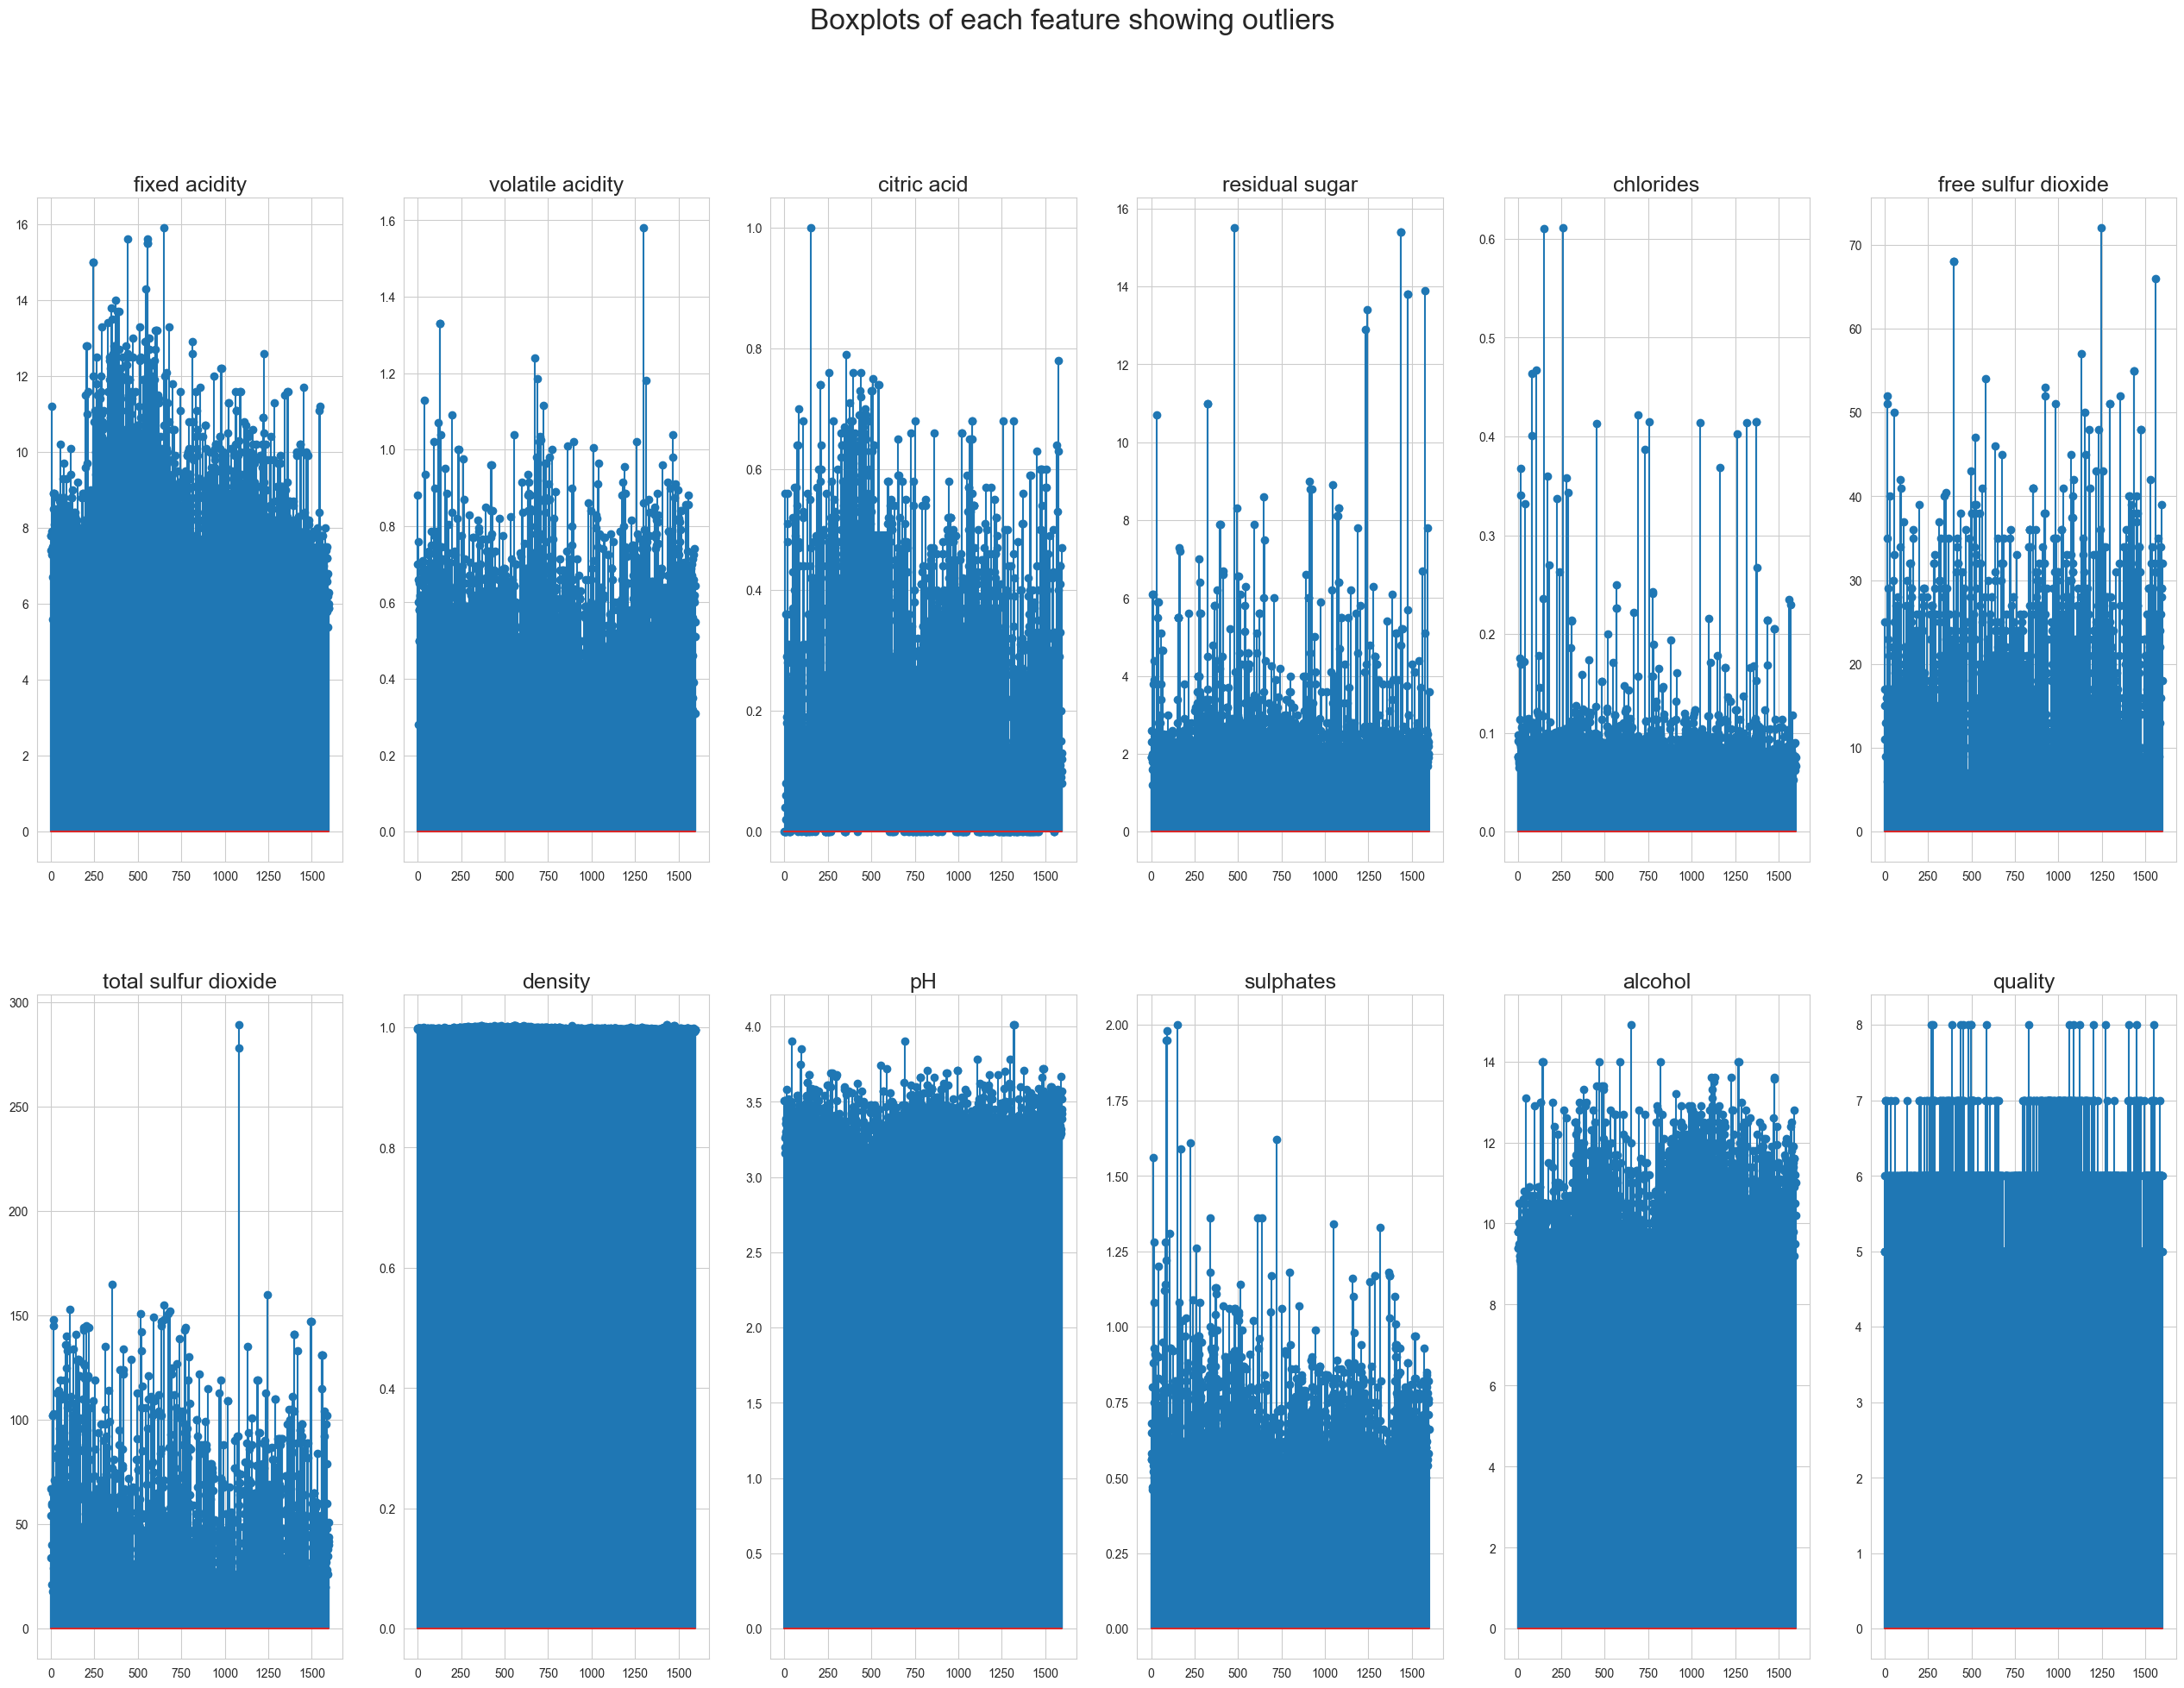

In [31]:
#Visualization code for outliers in stem
plt.figure(figsize=(32,22))
plt.suptitle('Boxplots of each feature showing outliers',fontsize=24)
for i in range(1,df.shape[1]+1):
    plt.subplot(2,6,i)
    plt.stem(df.iloc[:,i-1])
    plt.title(df.columns[i-1],fontsize=18)

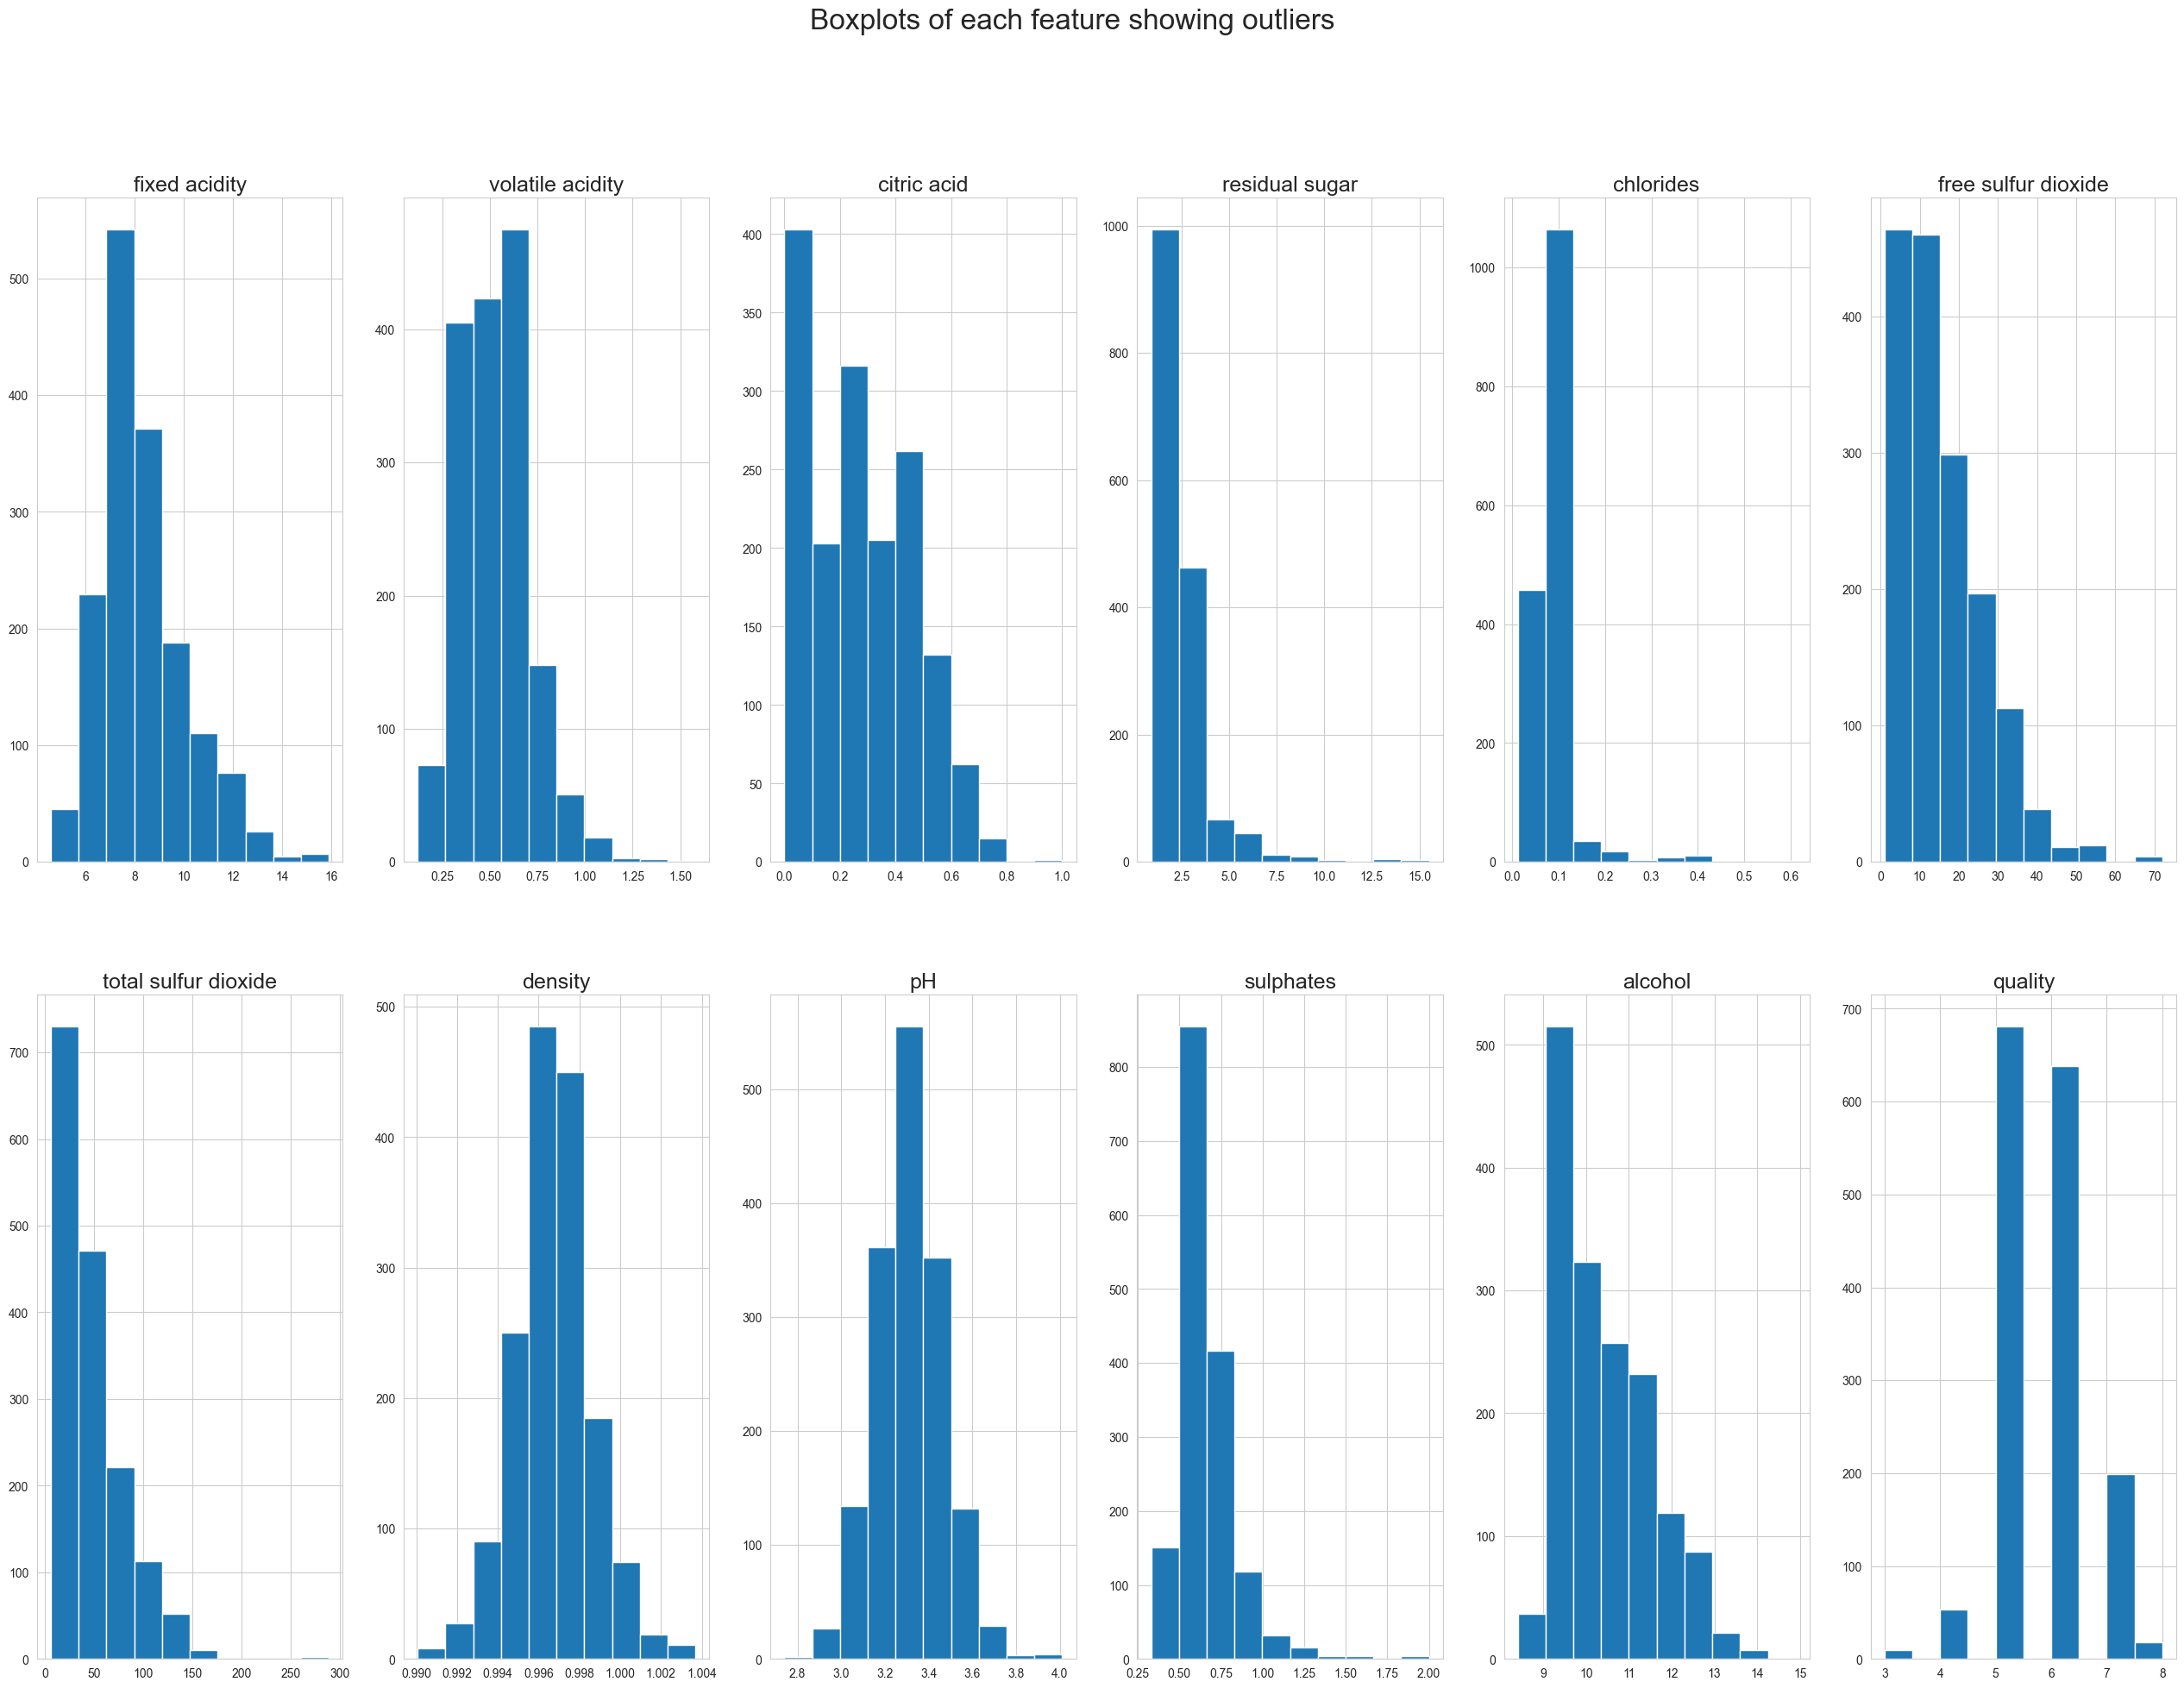

In [34]:
#Visualization code for outliers in stem
plt.figure(figsize=(32,22))
plt.suptitle('Boxplots of each feature showing outliers',fontsize=24)
for i in range(1,df.shape[1]+1):
    plt.subplot(2,6,i)
    plt.hist(df.iloc[:,i-1])
    plt.title(df.columns[i-1],fontsize=18)

### Algorithms Used for Outliers Detection
#### 1. Local OutlierFactor
#### 2. One Class SVM
#### 3. Isolation Forest
#### 4. Elliptical Envelope

### Visualization (Two Dimenisonal)

In [40]:
algorithms = [("Local Outlier Factor", LocalOutlierFactor()),
             ("One Class SVM", OneClassSVM()),
             ("Isolation Forest", IsolationForest()),
             ("Elliptical Envelope", EllipticEnvelope()),
              ]
X = pd.DataFrame({'alcohol':df.alcohol,'pH':df.pH})
color = np.array(['red','yellow'])

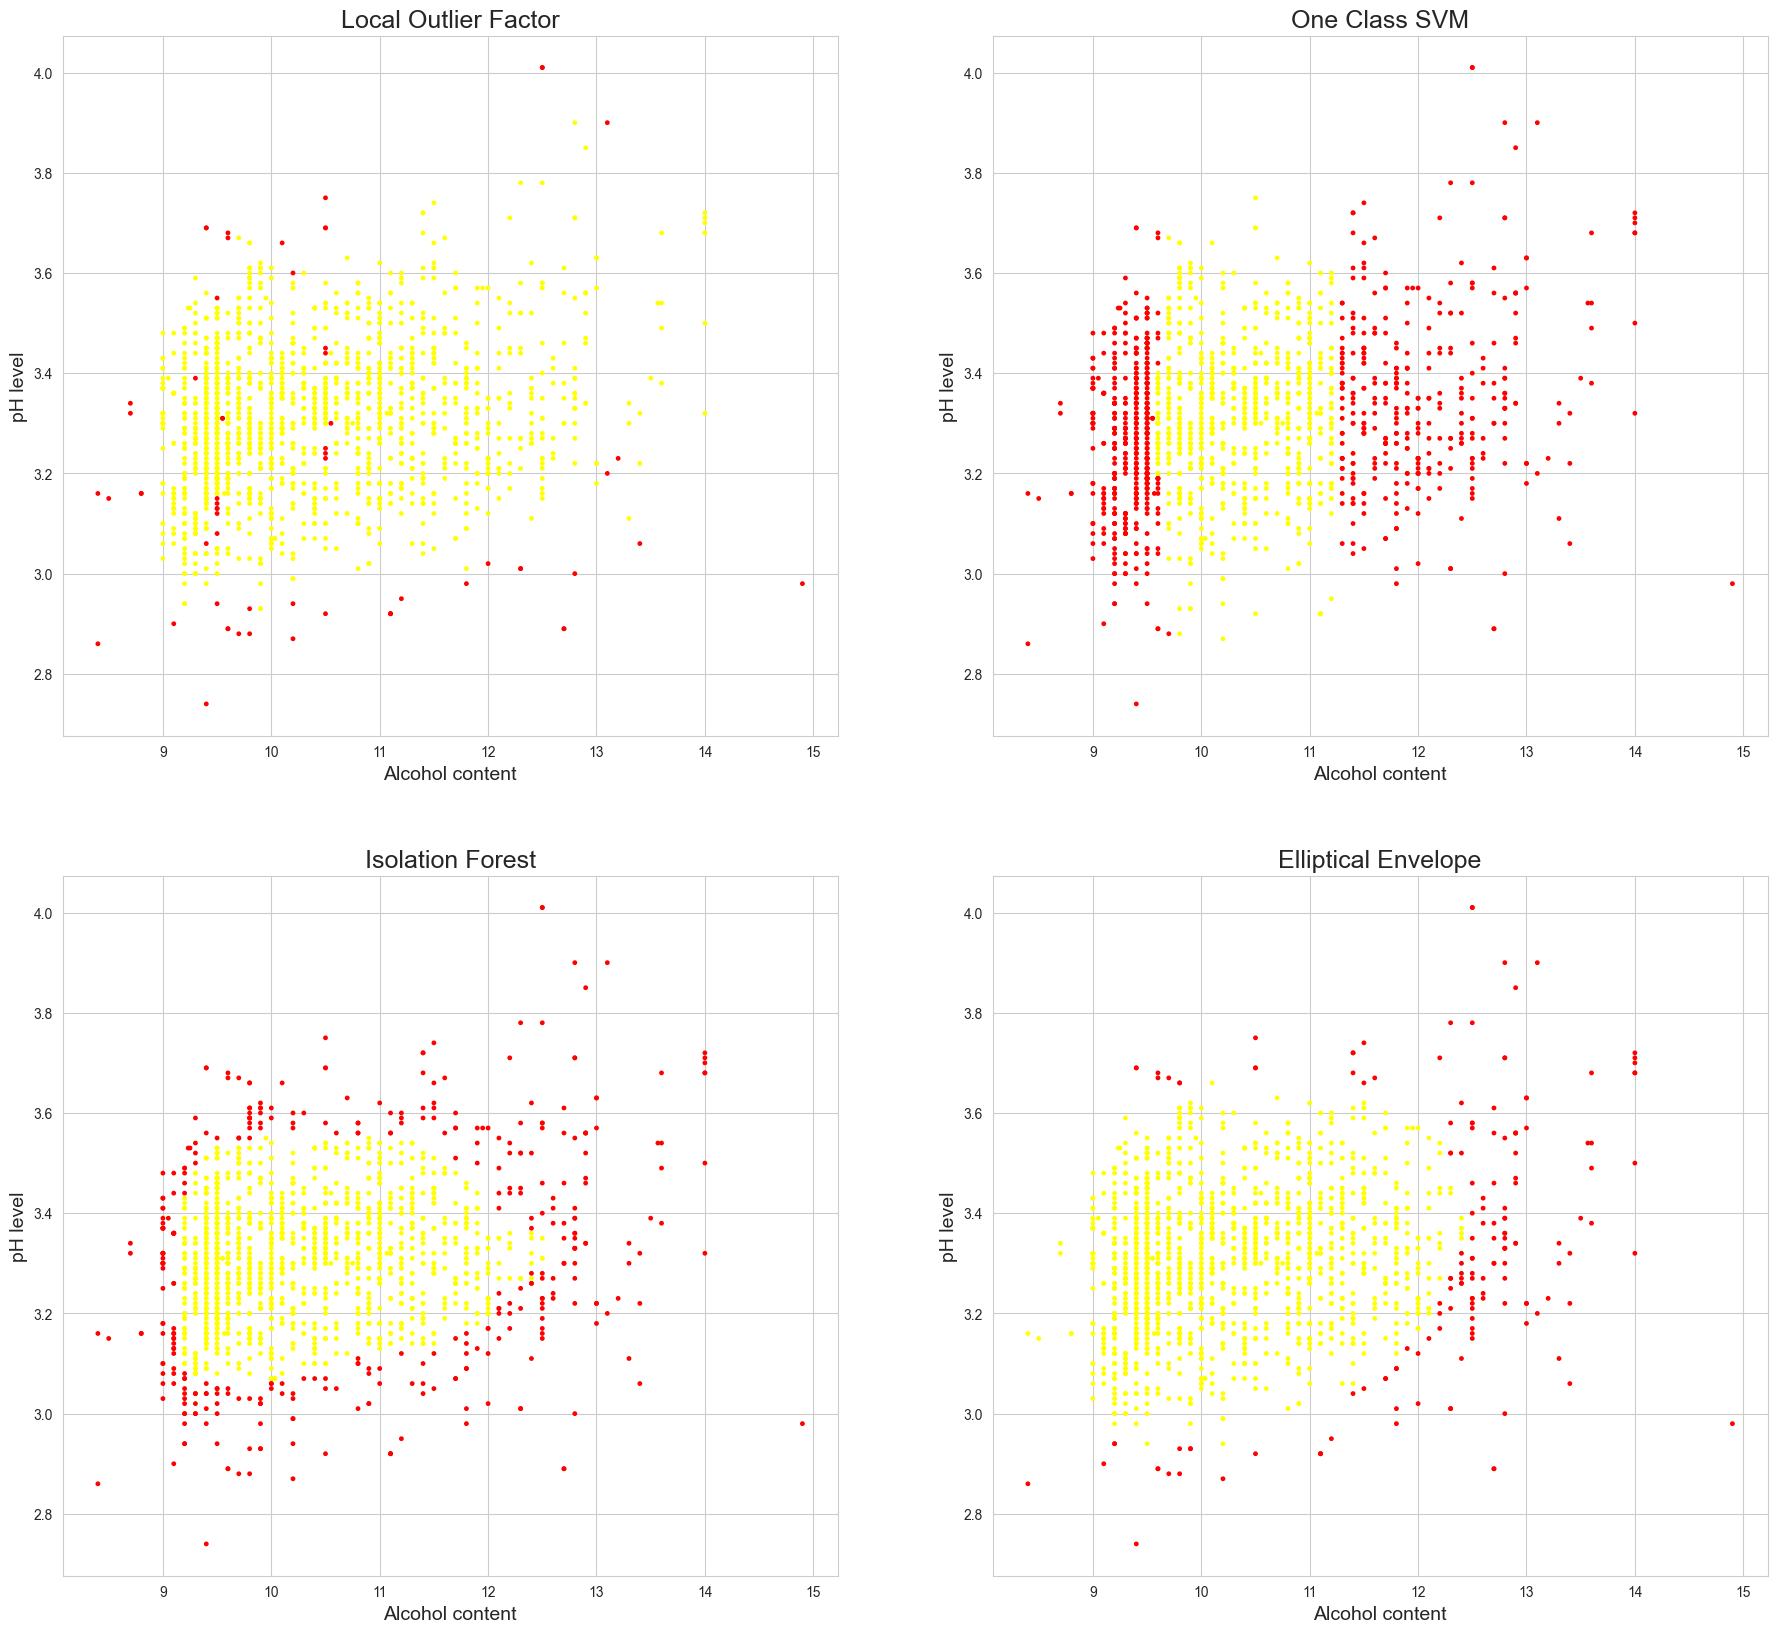

In [41]:
plt.figure(figsize = (22,20))
plot_num = 1
for name, algo in algorithms:   
    plt.subplot(2,2,plot_num)
    if name == "Local Outlier Factor":
        pred = algo.fit_predict(X)
    else:
        pred = algo.fit(X).predict(X)
    plt.title(name,fontsize=18)
    plt.xlabel('Alcohol content',fontsize=14)
    plt.ylabel('pH level',fontsize=14)
    plt.scatter(x=df.alcohol,y=df.pH,s=6,color=color[(pred+1)//2])
    plot_num+=1

### Algorithm Test on Red Wine Data

In [46]:
X = df

In [47]:
X = df

for name, algo in algorithms:
    if name == "Local Outlier Factor":
        pred = algo.fit_predict(X)
    else:
        pred = algo.fit(X).predict(X)
    outliers = [x for x in pred if x==-1]
    print(name, ':', len(outliers), 'potential outliers detected.')

Local Outlier Factor : 31 potential outliers detected.
One Class SVM : 799 potential outliers detected.
Isolation Forest : 142 potential outliers detected.
Elliptical Envelope : 160 potential outliers detected.


### Conclusion
#### To summarize, we looked at various methods for detecting and visualising outliers in various dimensional datasets using standard devations, and IQR is a simple method for looking at individual features. There are algorithms that can detect potential outliers for us when considering many features of a dataset at the same time; each of these algorithms computes outliers in a different way.


<center>
<h2><b>The End</b></h2>
------------------------------------------------------------------------------------------------------------------------------------------
</center>